<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/planilha/hoteis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o google drive

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Autentica o notebook

In [9]:
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

# Dados dos hoteis

## Carrega a planilha

In [10]:
ws = gc.open('PGC-hotels')
emerson = ws.worksheet('Emerson')

## Cria o DataFrame

In [11]:
import pandas as pd

df = pd.DataFrame(emerson.get_all_records())
states = pd.DataFrame({'state': ["AC",
"AL",
"AM",
"AP",
"BA",
"CE",
"DF",
"ES",
"GO",
"MA",
"MG",
"MS",
"MT",
"PA",
"PB",
"PE",
"PI",
"PR",
"RJ",
"RN",
"RO",
"RR",
"RS",
"SC",
"SE",
"SP",
"TO"]})

df[:1]

,done,name,n_reviews,sort_by,hl,state,overall_rating,stars,url,all_inclusive,region,google_travel,busca,url_travel,qtd_reviews
0,0,Aram Beach & Convention,-1,newest,pt-br,PB,3.8,4,https://www.google.com/maps/place/Aram+Beach+%...,0,NORDESTE,https://www.google.com/travel/hotels/entity/Ch...,API,-,2617


# Visualização

## Metricas agrupadas por estado

### metricas

In [54]:
 valores = df[['state', 'overall_rating', 'stars', 'qtd_reviews']].groupby(['state']).agg({'qtd_reviews': [ 'sum', 'min', 'max' ], 'overall_rating': [ 'mean', 'min', 'max' ], 'stars': [ 'mean' ]})

 valores

qtd_reviews               overall_rating               stars
              sum    min    max           mean  min  max      mean
state                                                             
AL          51599   2677  22660       4.600000  4.0  4.8  3.428571
AM           3807    773   3034       4.550000  4.3  4.8  3.500000
BA          94921   2203  18718       4.346667  3.4  4.8  3.733333
CE           4249   4249   4249       4.300000  4.3  4.3  3.000000
GO          21046   9644  11402       4.200000  4.1  4.3  3.500000
MA           2910   2910   2910       3.900000  3.9  3.9  2.000000
MG          14161    817   4513       4.160000  3.4  4.7  2.200000
MS           3199   3199   3199       4.800000  4.8  4.8  4.000000
MT           2744   2744   2744       4.700000  4.7  4.7  3.000000
PA           5228   2580   2648       4.150000  4.1  4.2  3.000000
PB           2617   2617   2617       3.800000  3.8  3.8  4.000000
PE           8281    575   5138       4.366667  3.9  4.7  2.000000
RJ          43525    619   6619       3.828571  2.8  4.8  3.214286
RN          21422   2617  11520       4.375000  4.0  4.7  4.250000
SC          20829  20829  20829       4.700000  4.7  4.7  4.000000
SE           6861    511   5035       3.500000  2.7  4.3  2.000000
SP          23706   1120   6129       4.000000  3.7  4.3  3.500000

array([<Axes: title={'center': '(qtd_reviews, sum)'}, xlabel='state'>,
       <Axes: title={'center': '(qtd_reviews, min)'}, xlabel='state'>,
       <Axes: title={'center': '(qtd_reviews, max)'}, xlabel='state'>,
       <Axes: title={'center': '(overall_rating, mean)'}, xlabel='state'>,
       <Axes: title={'center': '(overall_rating, min)'}, xlabel='state'>,
       <Axes: title={'center': '(overall_rating, max)'}, xlabel='state'>,
       <Axes: title={'center': '(stars, mean)'}, xlabel='state'>],
      dtype=object)

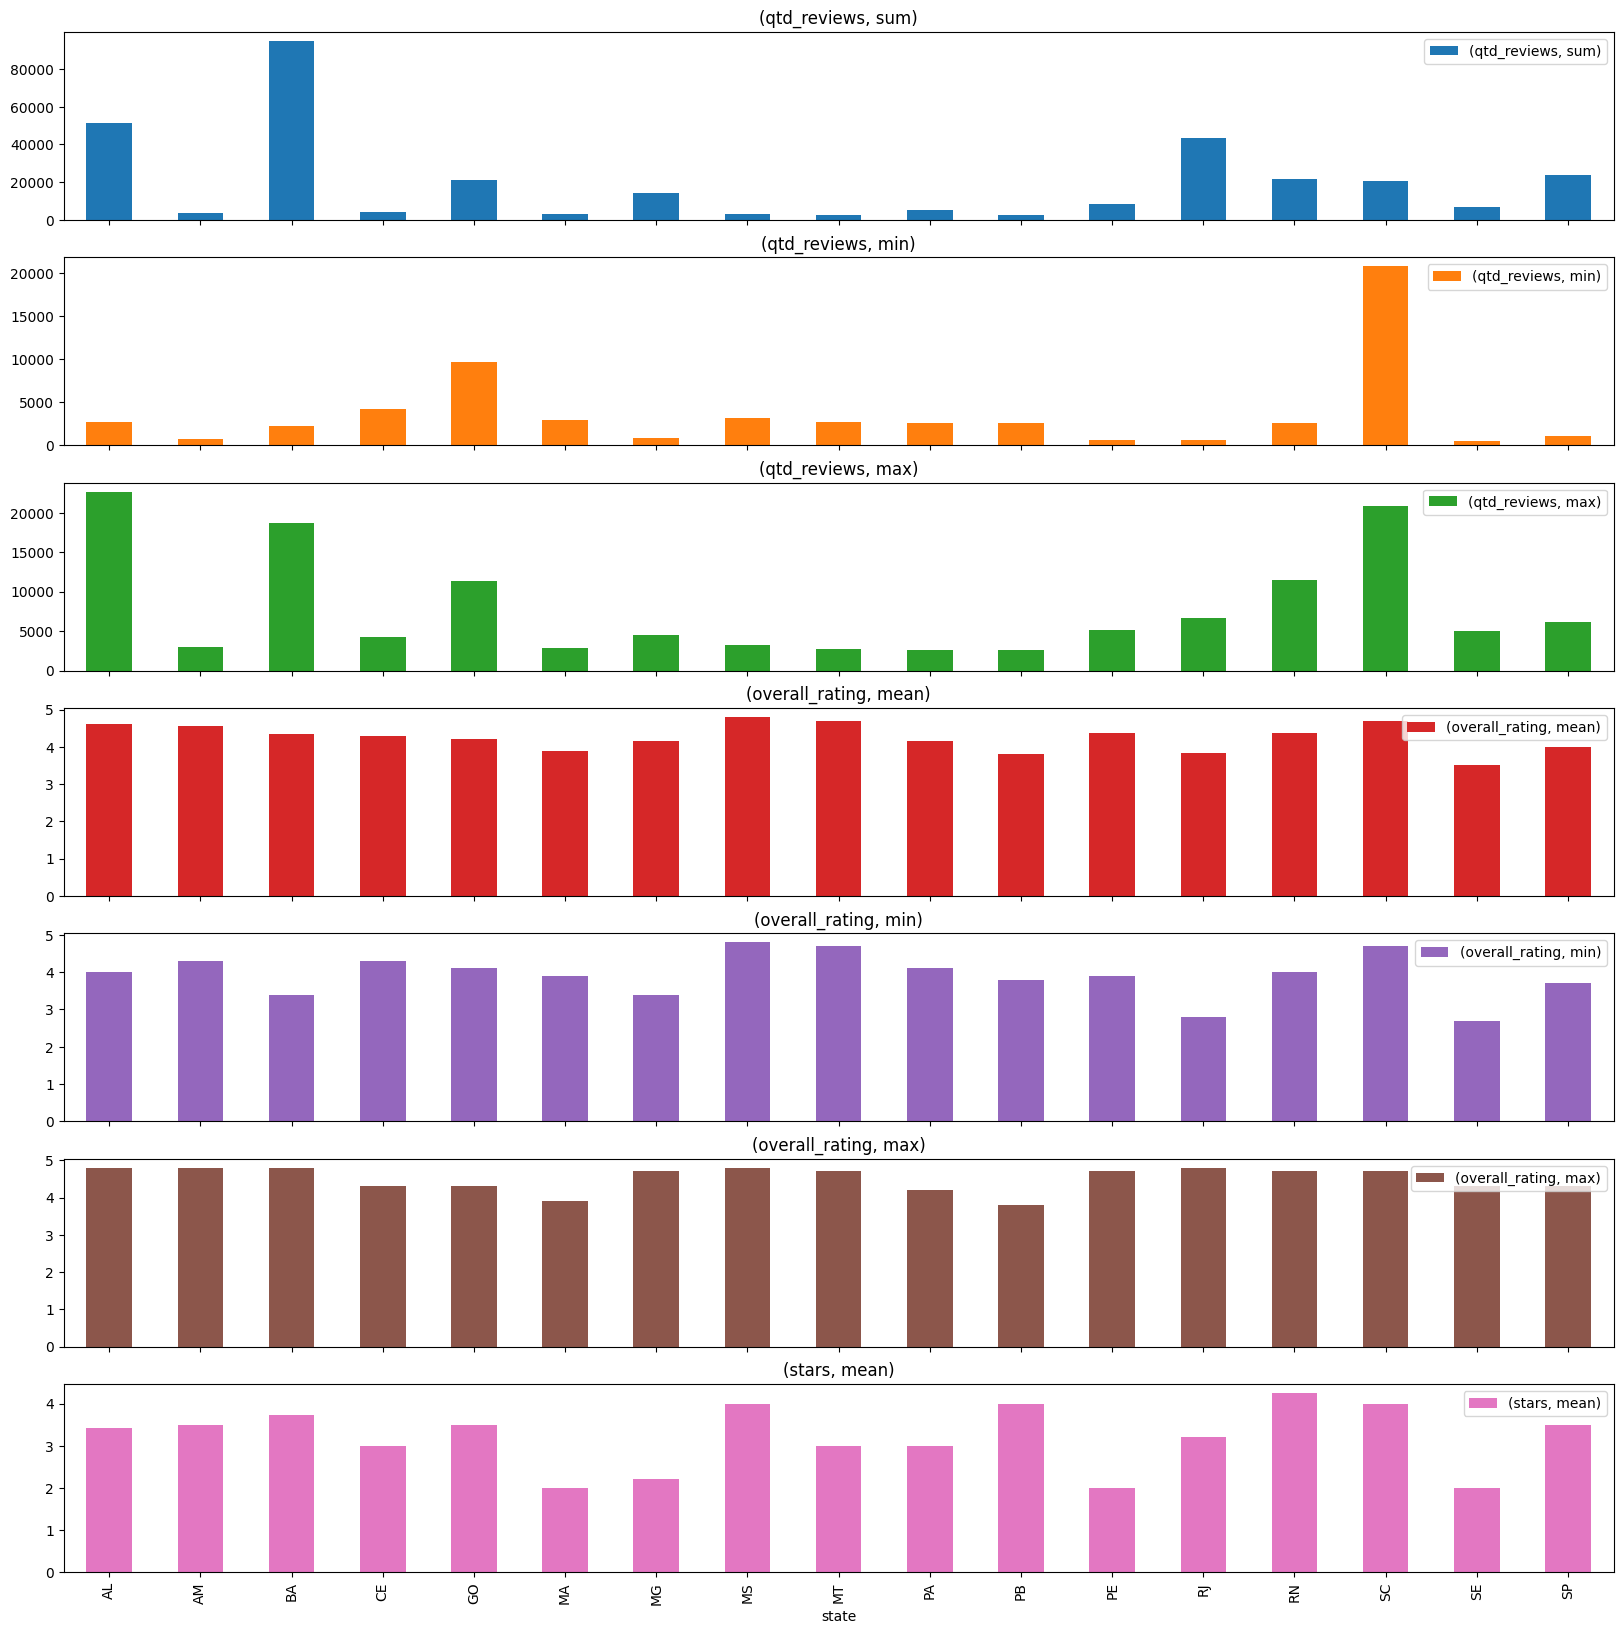

In [55]:
valores.plot(kind='bar', subplots=True, figsize=(20, 20))

#### Estados sem hoteis

In [56]:
## estados sem hoteis
set(states.state).symmetric_difference(df.state)

{'AC', 'AP', 'DF', 'ES', 'PI', 'PR', 'RO', 'RR', 'RS', 'TO'}

### Distribuição por Estado

<Axes: ylabel='state'>

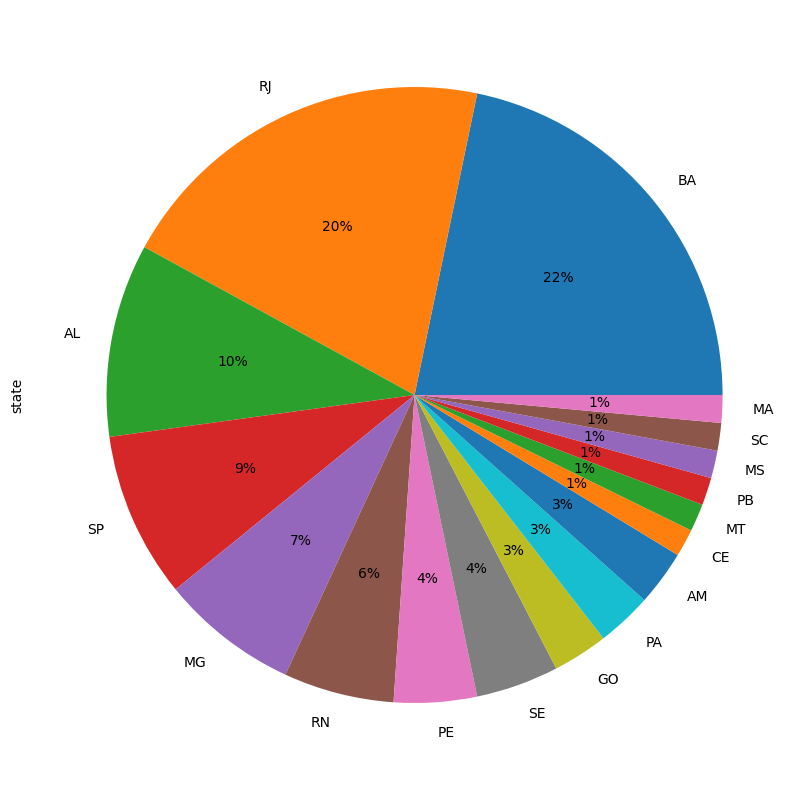

In [25]:
import matplotlib.pyplot as plt

df['state'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

### Quantidade de hoteis agrupados por estrela

<Axes: xlabel='state'>

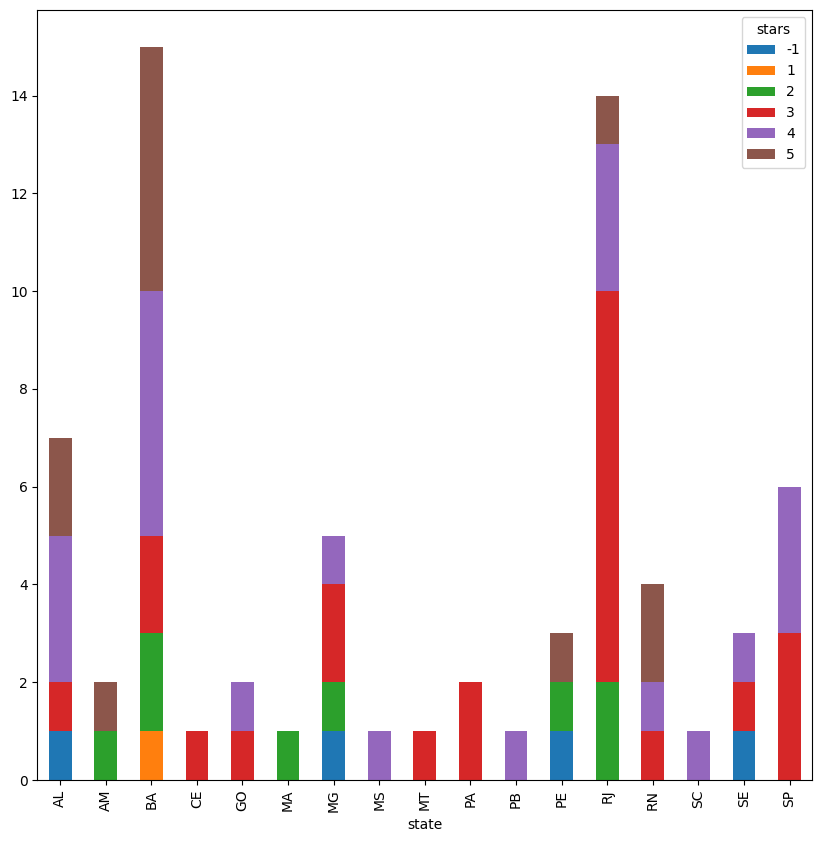

In [52]:
df.groupby(['state','stars']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

<Axes: xlabel='state'>

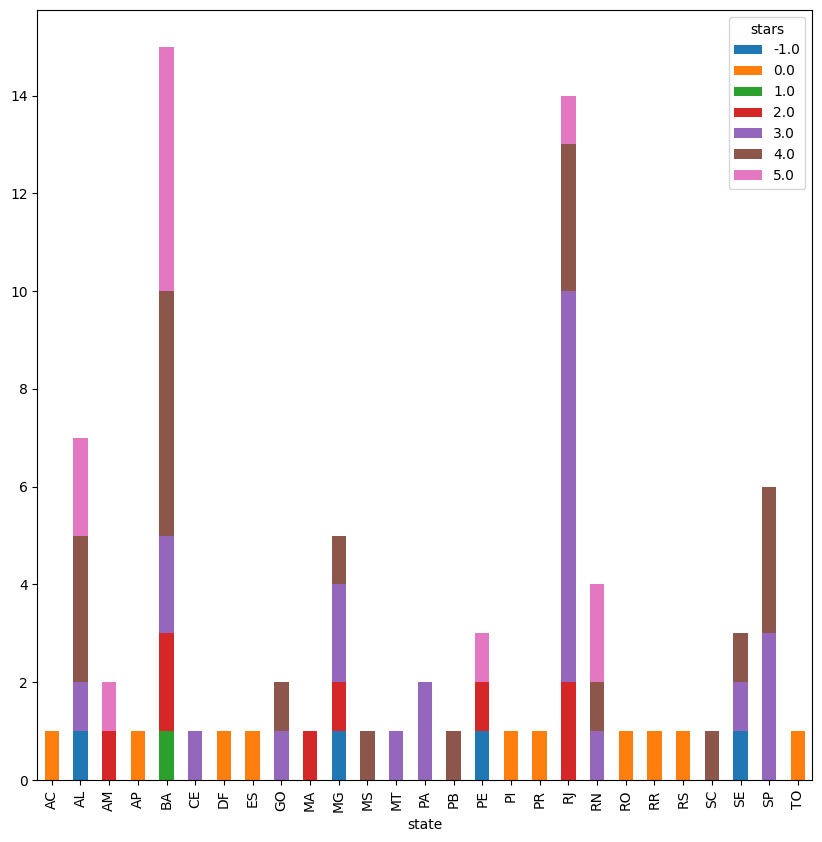

In [39]:
## como fazer o zero ficar em zero?
df[['state','stars']].join(states.set_index('state'), how='right', on='state').fillna(0).groupby(['state','stars']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

### Quantidade de hoteis por estrela

<Axes: xlabel='stars'>

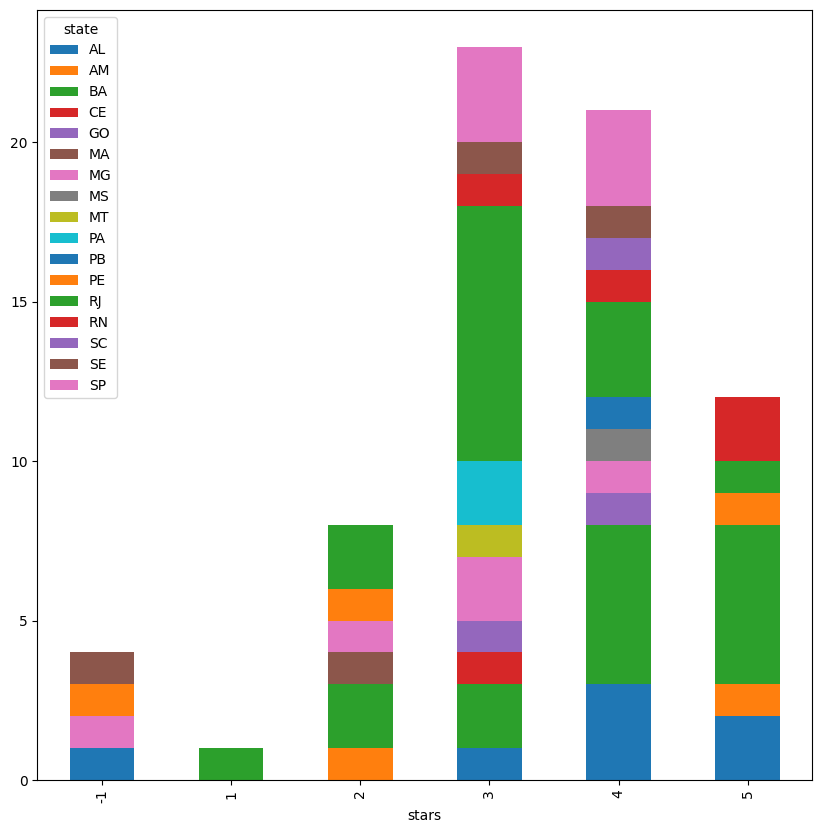

In [18]:
df.groupby(['stars','state']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

### Hoteis com pacote all inclusive

<Axes: xlabel='all_inclusive'>

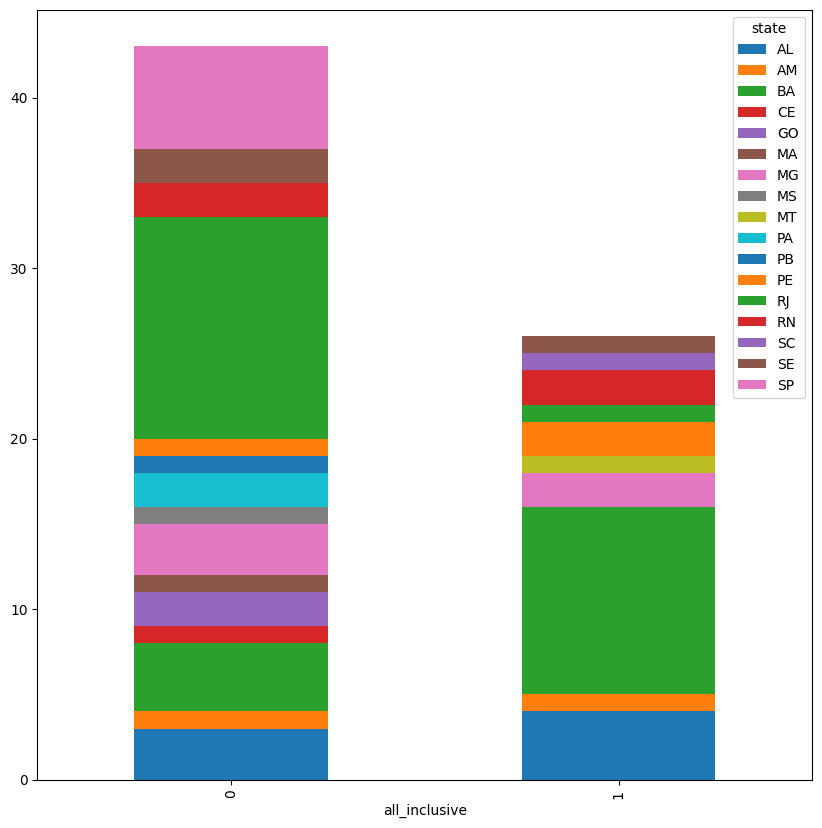

In [19]:
df.groupby(['all_inclusive','state']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

<Axes: xlabel='state'>

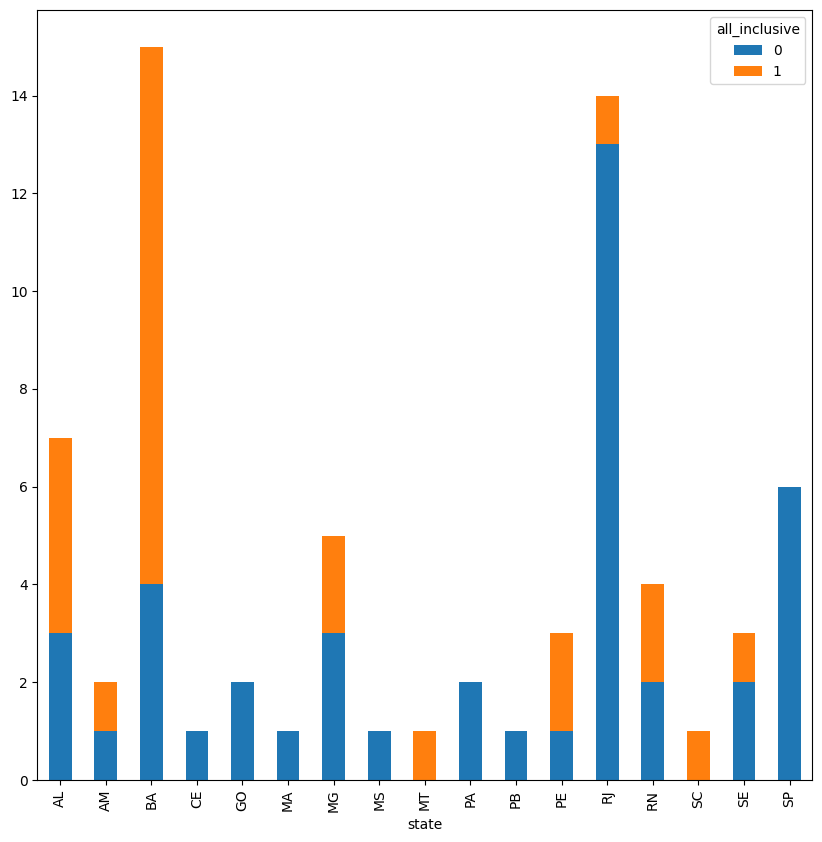

In [21]:
df.groupby(['state','all_inclusive']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

## Distribuição de hoteis com pacotes All Inclusive

<Axes: ylabel='all_inclusive'>

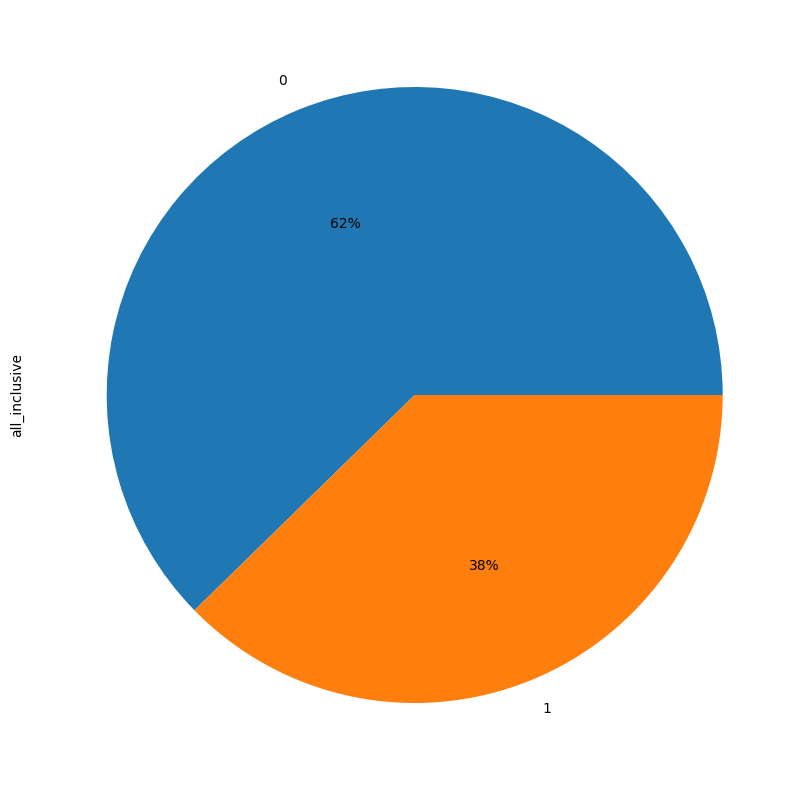

In [22]:
 df['all_inclusive'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

## Metricas agrupadas por região

In [57]:
 valores = df[['region', 'overall_rating', 'stars', 'qtd_reviews']].groupby(['region']).agg({'qtd_reviews': [ 'sum', 'min', 'max' ], 'overall_rating': [ 'mean', 'min', 'max' ], 'stars': [ 'mean' ]})

 valores

qtd_reviews               overall_rating           stars
                     sum    min    max           mean  min  max  mean
region                                                               
CENTRO-OESTE       26989   2744  11402       4.475000  4.1  4.8  3.50
NORDESTE          193677    511  22660       4.300000  2.7  4.8  3.25
NORTE               9035    773   3034       4.350000  4.1  4.8  3.25
SUDESTE            80575    619   6619       3.920833  2.8  4.8  3.25
SUL                20829  20829  20829       4.700000  4.7  4.7  4.00

array([<Axes: title={'center': '(qtd_reviews, sum)'}, xlabel='region'>,
       <Axes: title={'center': '(qtd_reviews, min)'}, xlabel='region'>,
       <Axes: title={'center': '(qtd_reviews, max)'}, xlabel='region'>,
       <Axes: title={'center': '(overall_rating, mean)'}, xlabel='region'>,
       <Axes: title={'center': '(overall_rating, min)'}, xlabel='region'>,
       <Axes: title={'center': '(overall_rating, max)'}, xlabel='region'>,
       <Axes: title={'center': '(stars, mean)'}, xlabel='region'>],
      dtype=object)

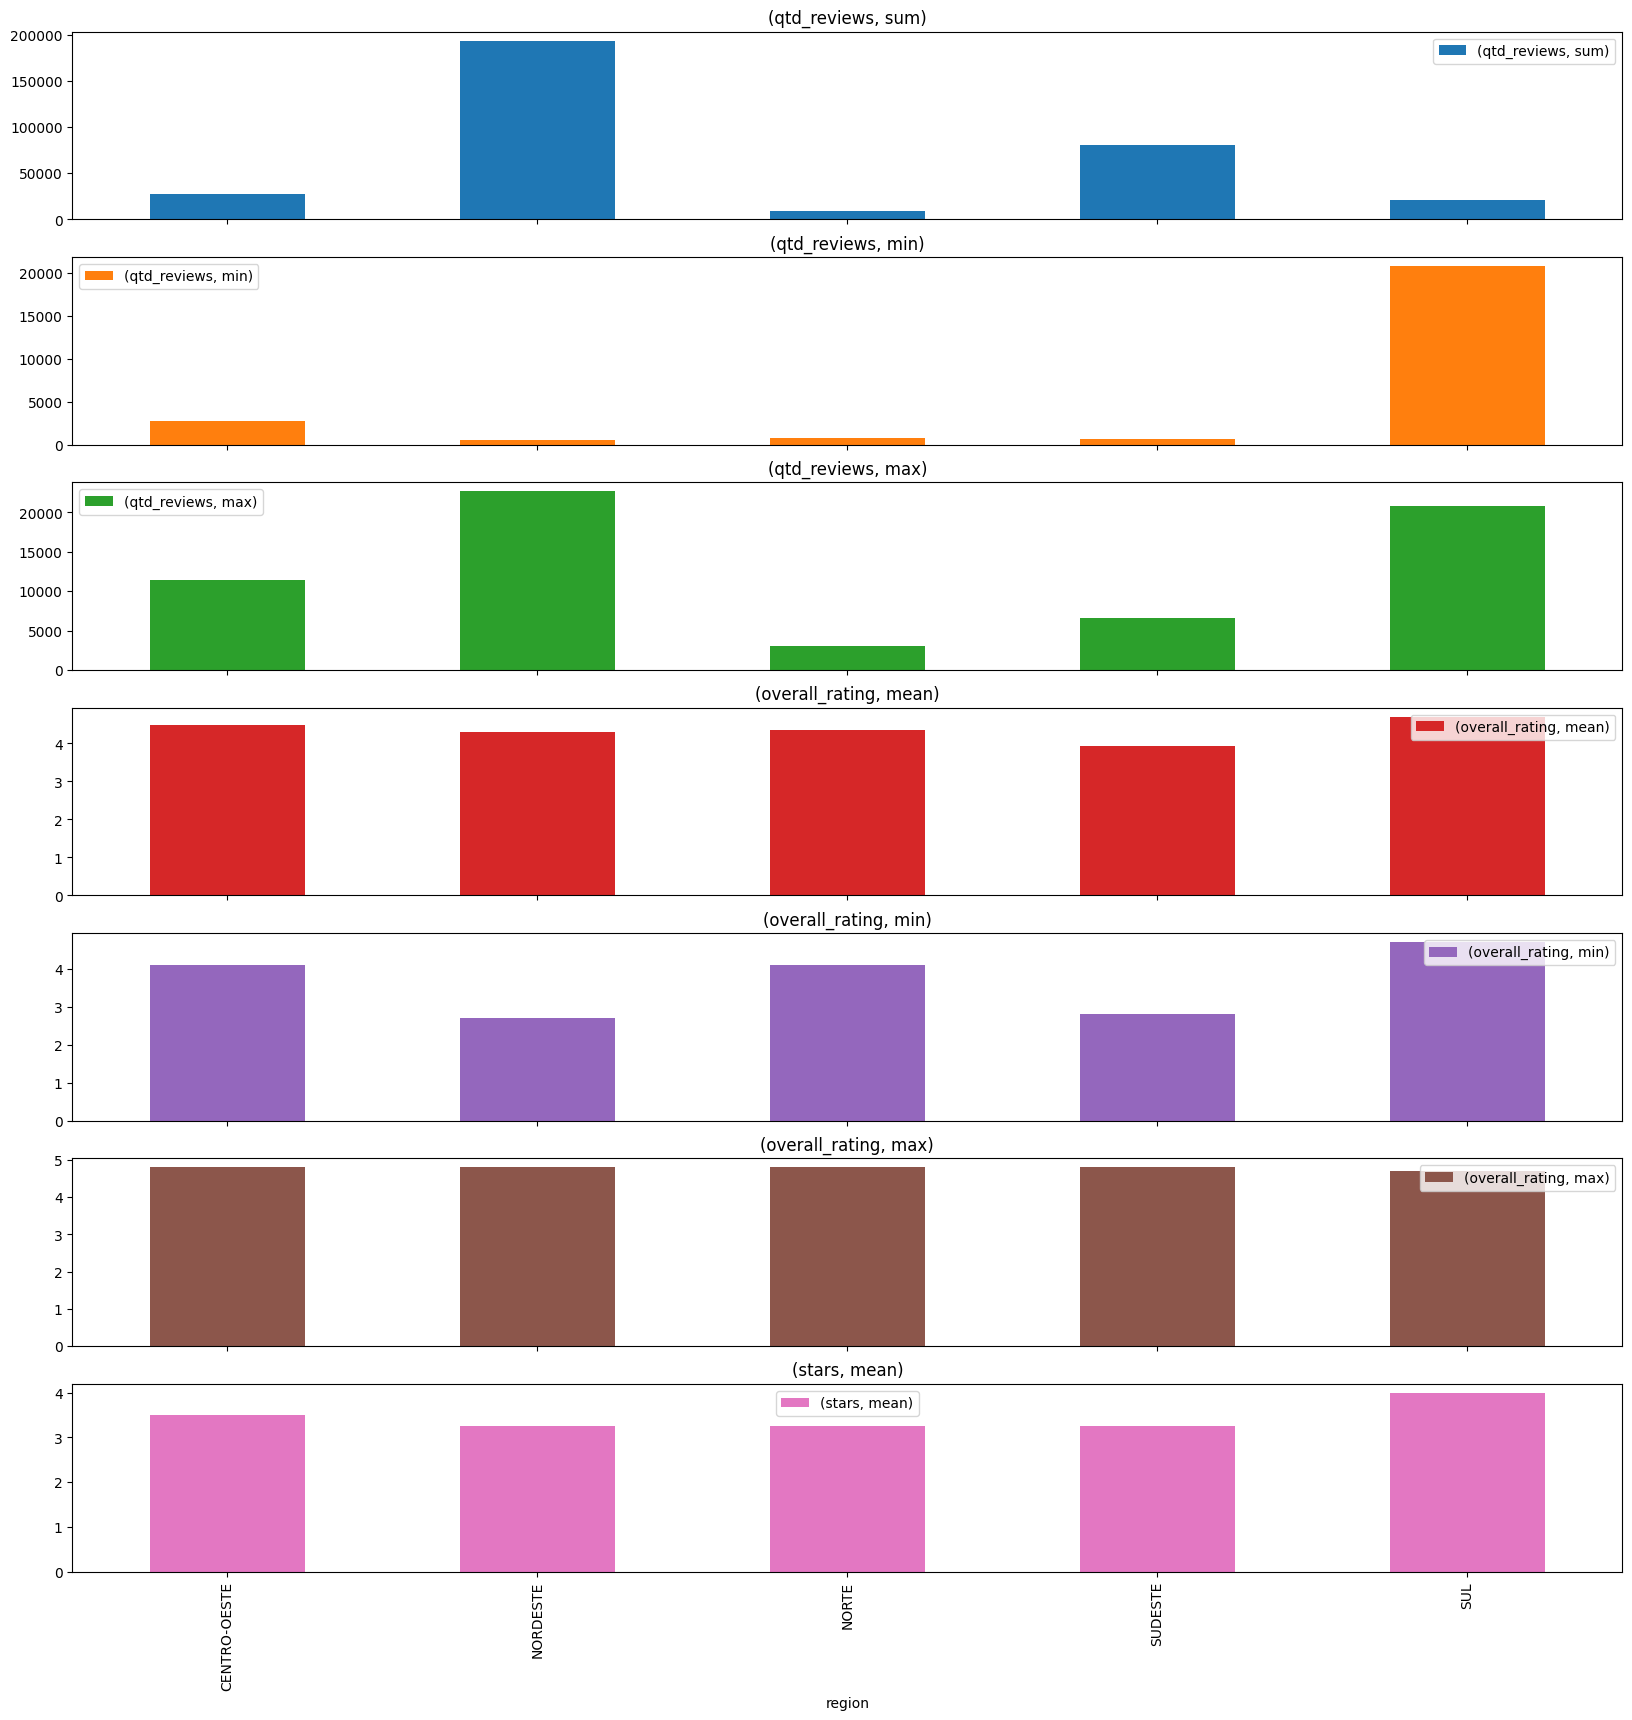

In [30]:
valores.plot(kind='bar', subplots=True, figsize=(20, 20))

<Axes: ylabel='region'>

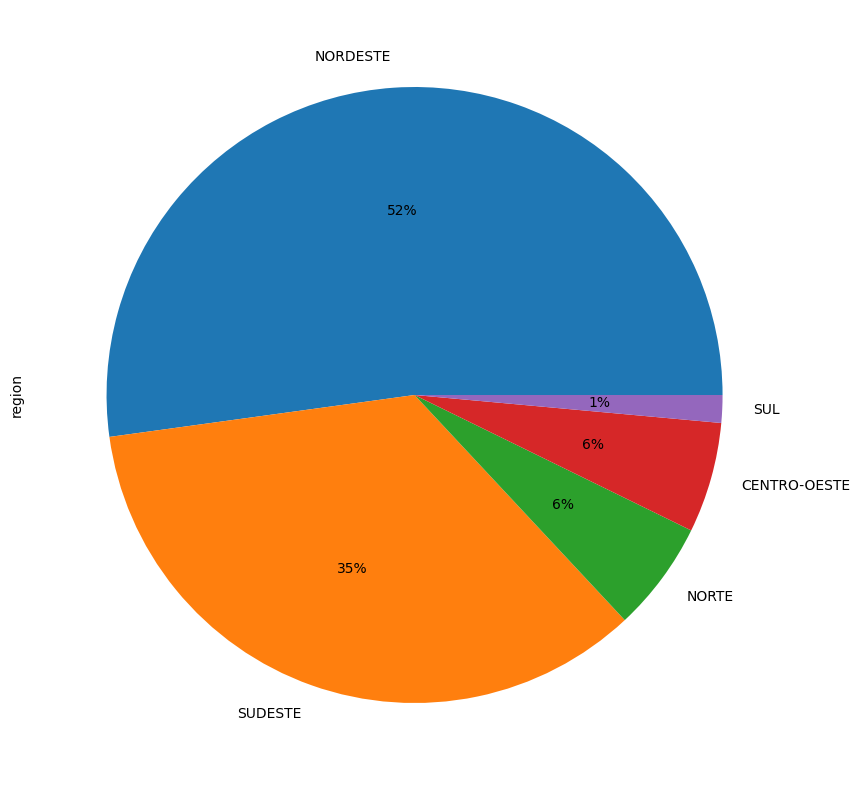

In [31]:
import matplotlib.pyplot as plt

df['region'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

<Axes: xlabel='region'>

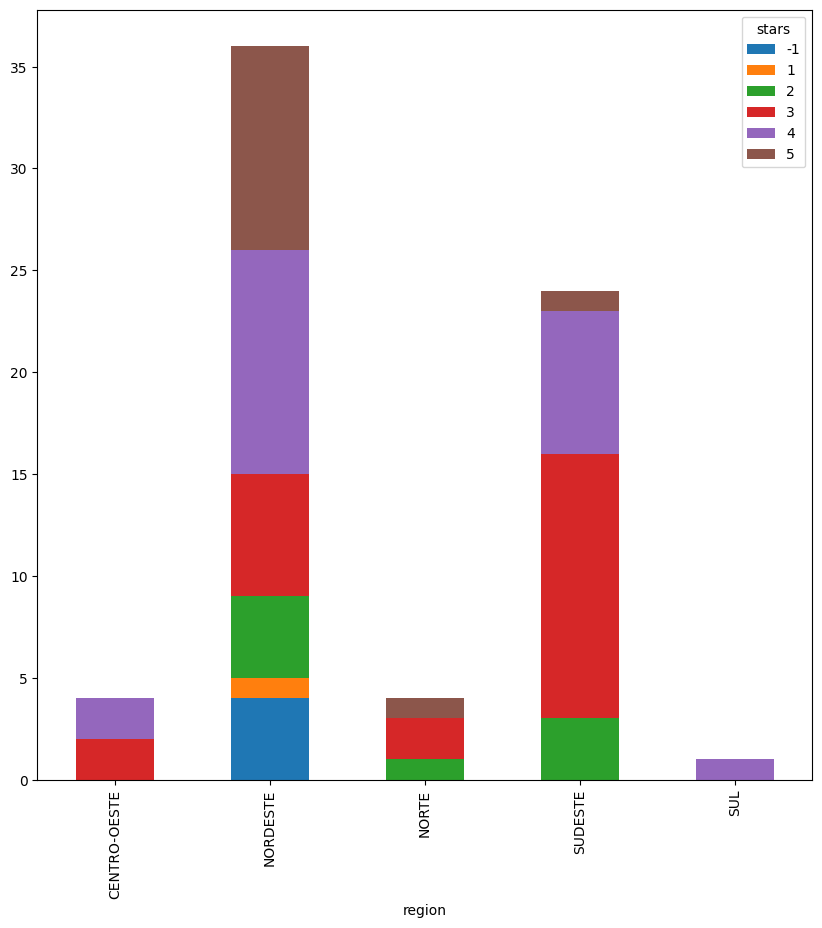

In [32]:
df.groupby(['region','stars']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

<Axes: xlabel='stars'>

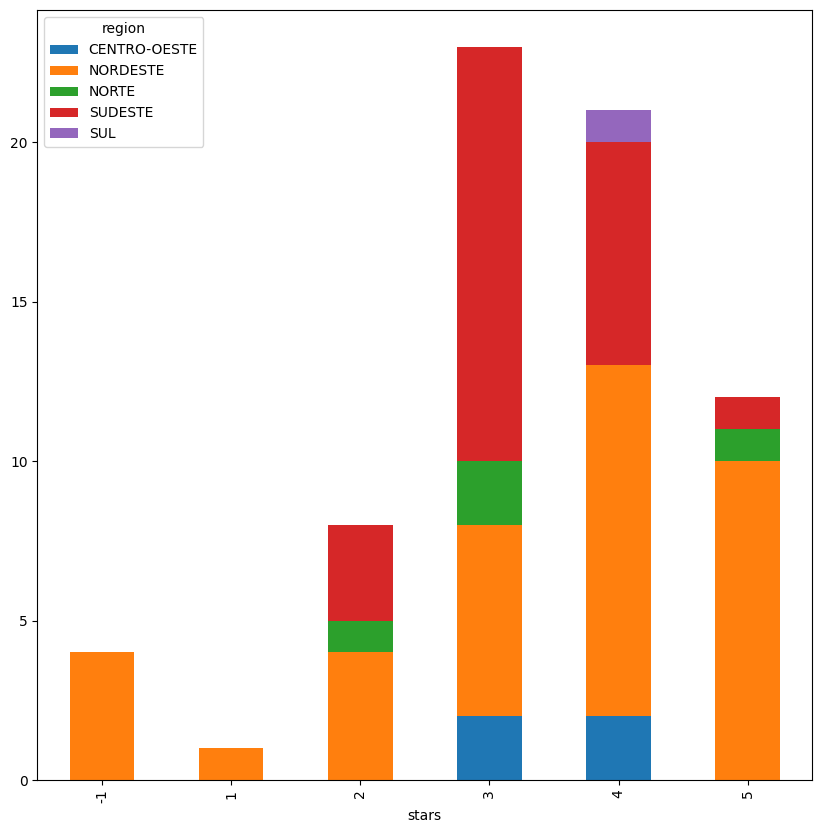

In [41]:
df.groupby(['stars','region']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

<Axes: xlabel='all_inclusive'>

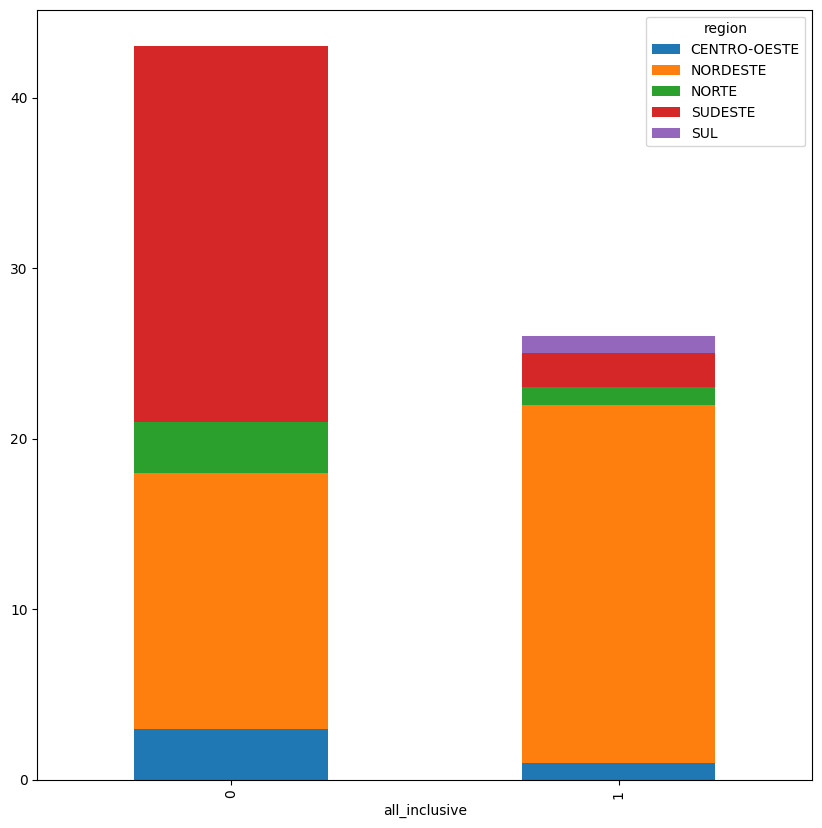

In [43]:
df.groupby(['all_inclusive','region']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

<Axes: xlabel='region'>

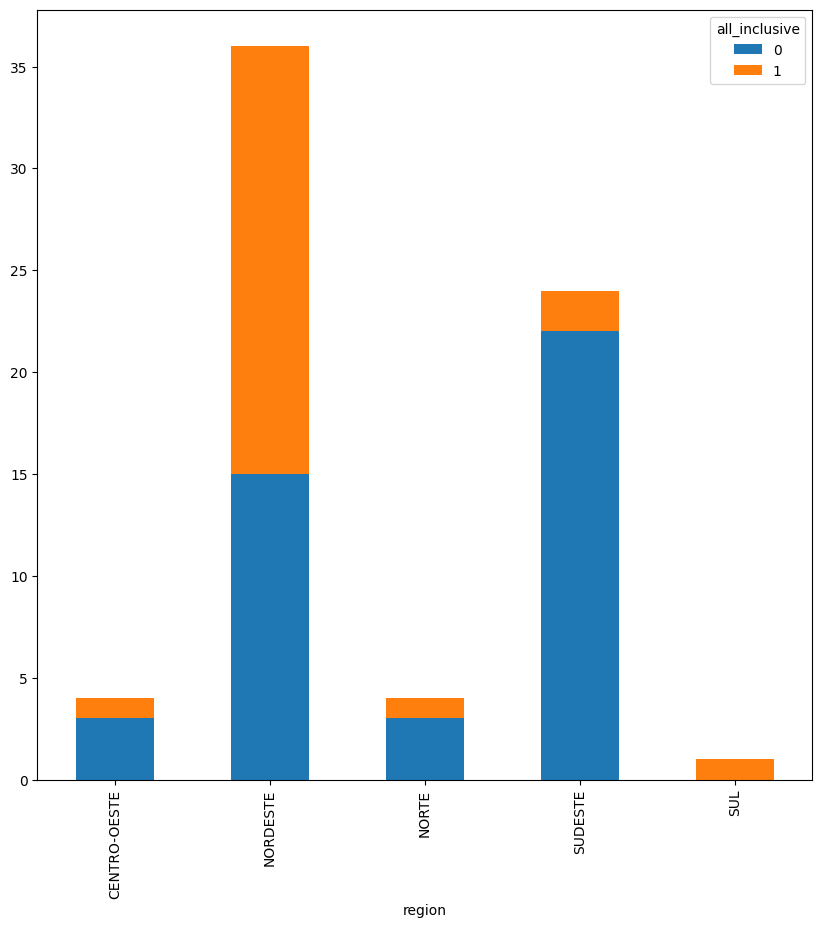

In [44]:
df.groupby(['region','all_inclusive']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))

<Axes: xlabel='region'>

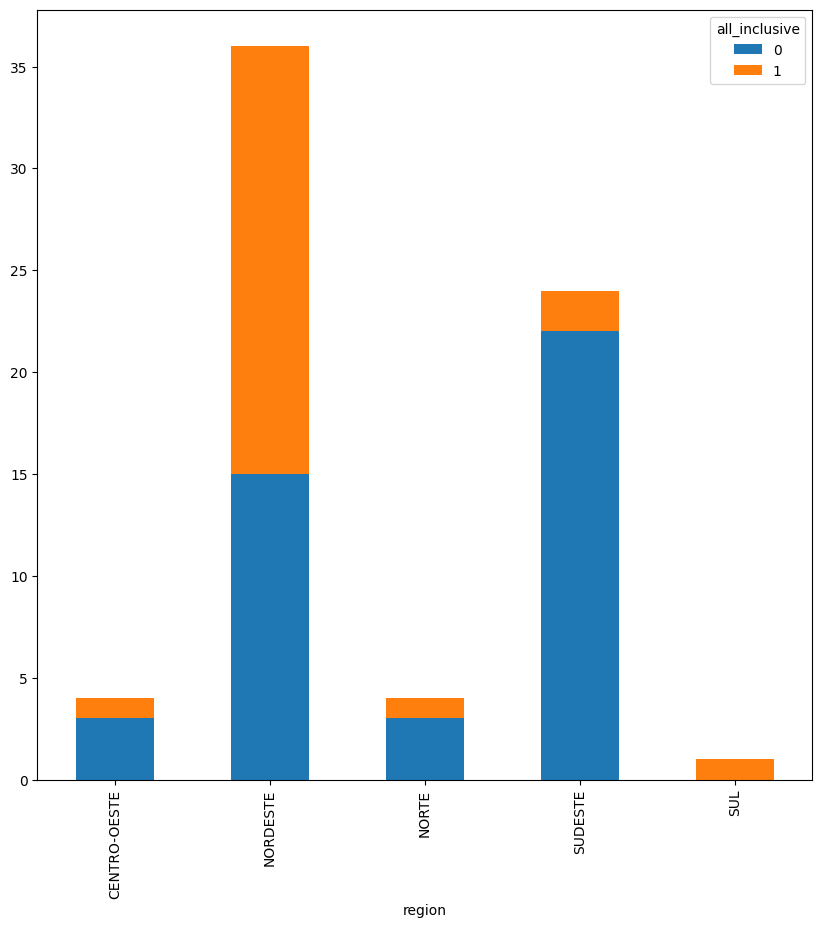

In [46]:
df.groupby(['region','all_inclusive']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 10))